# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the '/home/rimsky/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [5]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


/home/rimsky/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rimsky/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rimsky/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

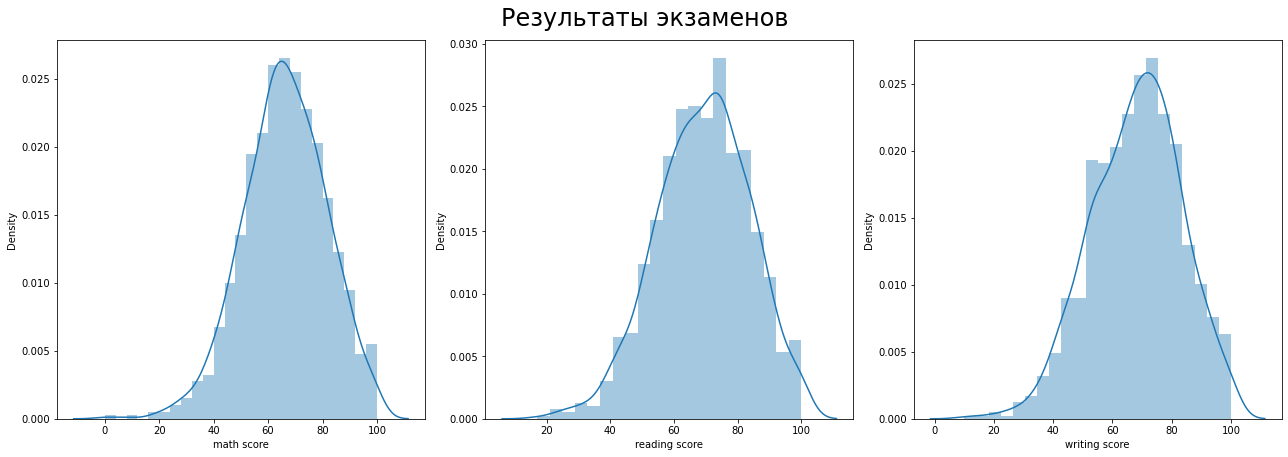

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(df['math score'].dropna(), ax=axes[0])
sns.distplot(df['reading score'].dropna(), ax=axes[1])
sns.distplot(df['writing score'].dropna(), ax=axes[2])

fig.suptitle('Результаты экзаменов', y=1.05, fontsize=24)
fig.tight_layout()

In [7]:
print('Медиана результатов экзамена по математике: {:.0f}'.format(df['math score'].median()))
print('Медиана результатов экзамена по чтению: {:.0f}'.format(df['reading score'].median()))
print('Медиана результатов экзамена по письменности: {:.0f}'.format(df['writing score'].median()))

Медиана результатов экзамена по математике: 66
Медиана результатов экзамена по чтению: 70
Медиана результатов экзамена по письменности: 69


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


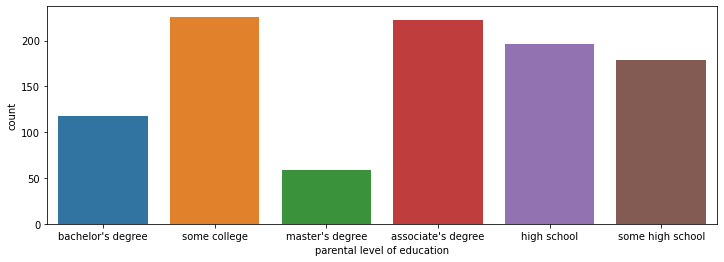

In [9]:
plt.figure(figsize=(12, 4))
sns.countplot(x='parental level of education', data=df)

<Figure size 1728x1728 with 0 Axes>

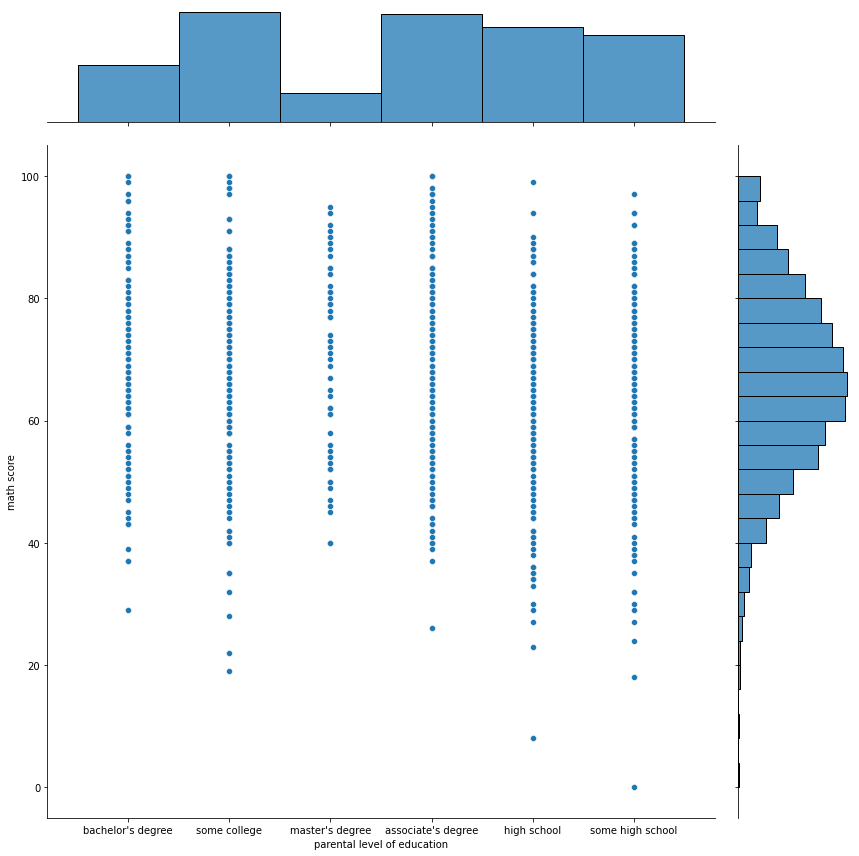

In [10]:
plt.figure(figsize=(24, 24))
sns.jointplot(x='parental level of education', y='math score', data=df, height=12)

In [ ]:
Есть некоторая зависимость между уровнем образования родителей и количеством баллов по математике, хотя и не без выбросов. 
Так, например, дети, чьи родители имели высшее образования, чаще набирают высокие баллы.
А дети, чьи родители закончили лишь школу, и которые набрали больше 90 баллов уже похожи на выбросы.

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [43]:

print('Число студенток, набравших больше 90 баллов по всем предметам: {}'.format(len(df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)])))


Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [12]:
df.groupby(['gender']).count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482


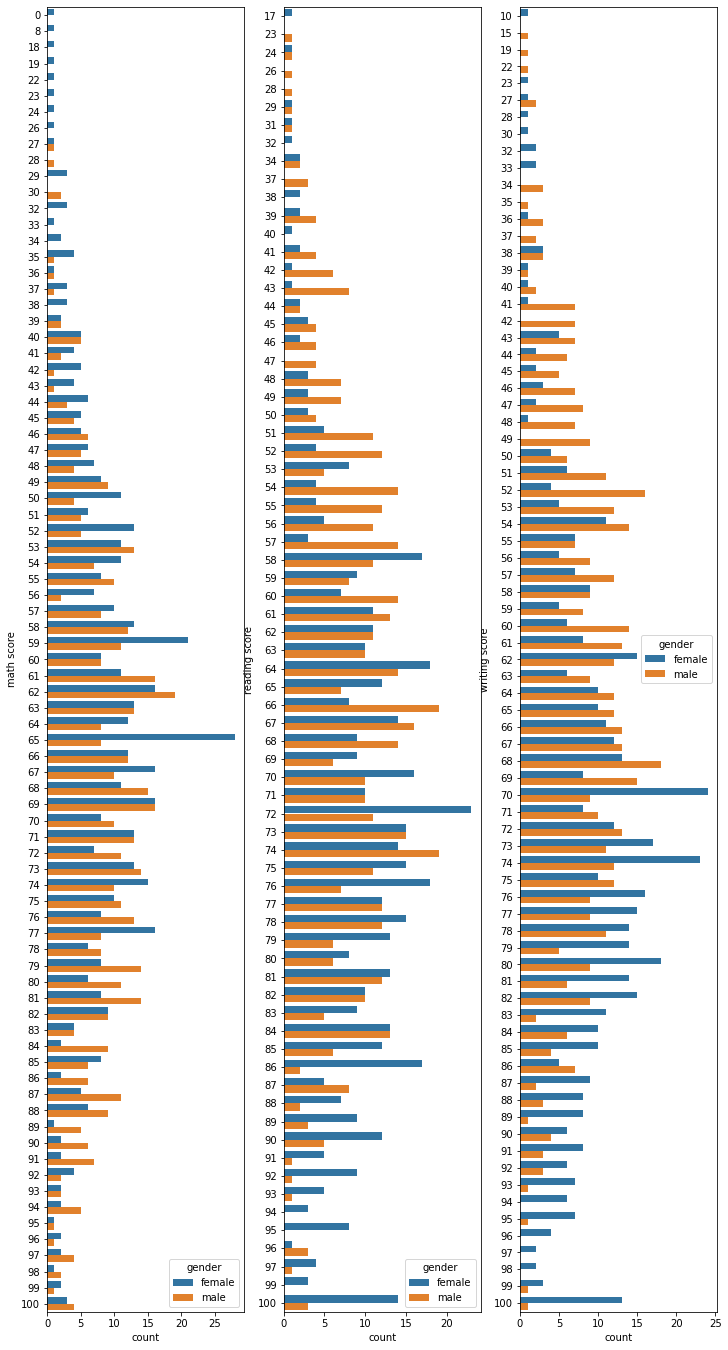

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 24))

sns.countplot(y='math score', data=df, hue='gender', ax=axes[0])
sns.countplot(y='reading score', data=df, hue='gender', ax=axes[1])
sns.countplot(y='writing score', data=df, hue='gender', ax=axes[2])
#girls power

In [14]:
df.groupby(['gender']).agg(['min', 'max', 'median'])


math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100     65            17  100     73            10  100   
male           27  100     69            23  100     66            15  100   

               
       median  
gender         
female     74  
male       64

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [16]:
df.groupby(['gender', 'test preparation course', 'lunch']).agg('mean')

math score  reading score  \
gender test preparation course lunch                                     
female completed               free/reduced   60.785714      73.428571   
                               standard       71.131579      79.798246   
       none                    free/reduced   52.890756      63.831933   
                               standard       66.530233      73.386047   
male   completed               free/reduced   65.639344      65.786885   
                               standard       75.955752      72.601770   
       none                    free/reduced   60.609524      59.076190   
                               standard       69.832512      64.719212   

                                             writing score  
gender test preparation course lunch                        
female completed               free/reduced      74.371429  
                               standard          81.508772  
       none                    free/reduced      61.781513  
                               standard          72.967442  
male   completed               free/reduced      65.737705  
                               standard          71.982301  
       none                    free/reduced      55.285714  
                               standard          61.906404

In [ ]:
Очевидно, что подготовка к тесту должна влиять на средний балл. Удивительно, что на средний балл влияет и то, 
как ты хорошо питаешься:)

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

In [17]:
df.groupby(['race/ethnicity']).count()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group A,89,89,89,89,89,89,89
group B,190,190,190,190,190,190,190
group C,319,319,319,319,319,319,319
group D,262,262,262,262,262,262,262
group E,140,140,140,140,140,140,140


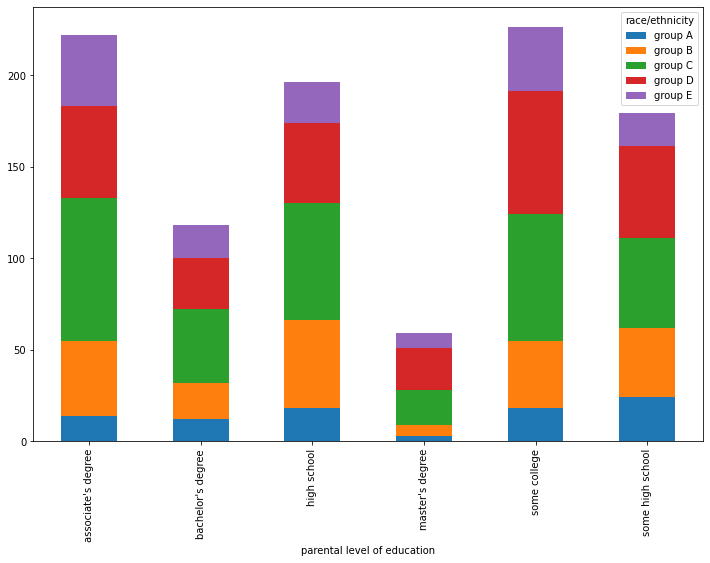

In [24]:

df_plt = df.groupby(['race/ethnicity', 'parental level of education']).size().reset_index().pivot(columns='race/ethnicity', index='parental level of education', values=0)
df_plt.plot(kind='bar', stacked=True, figsize=(12, 8))
#так и не понял, какая буква за какую расу отвечает...


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

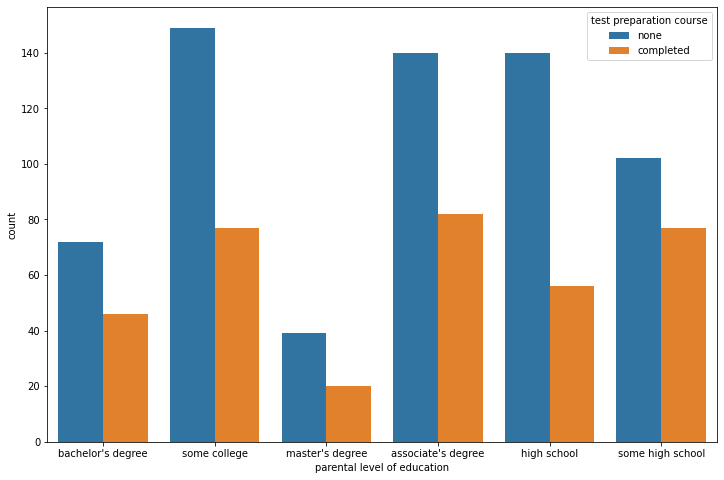

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x='parental level of education', data=df, hue='test preparation course')

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

math results
False     40
True     960
dtype: int64


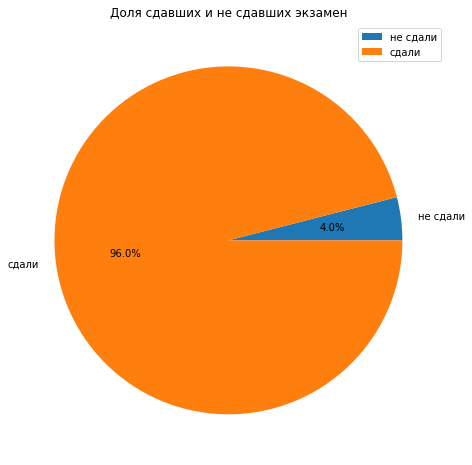

In [114]:
df['math results'] = df['math score'] >= 40
print(df.groupby('math results').size())

labels = ['не сдали', 'сдали']
plt.figure(figsize=(8,8))
plt.pie(df.groupby('math results').size(), labels=labels, autopct='%1.1f%%')
plt.title('Доля сдавших и не сдавших экзамен')
plt.legend()
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

mark
grade A    133
grade B    255
grade C    258
grade D    258
grade E     50
grade O     46
dtype: int64


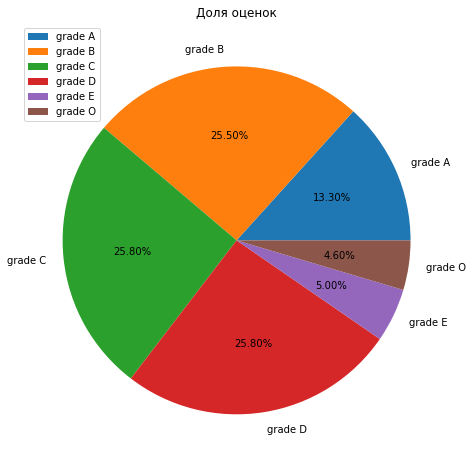

In [112]:
#используя mean() среднее считалось некорректно, судя по всему, из-за столбца math results.
#как можно поступать в такой ситуации?

df['mean score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

def rate(math, mean):
    if (math > 40) & (mean < 61):
        return 'grade D'
    elif (mean > 60) & (mean < 71):
        return 'grade C'
    elif (mean > 70) & (mean < 81):
        return 'grade B'
    elif (mean > 80) & (mean < 91):
        return 'grade A'
    elif (mean > 90) & (mean < 101):
        return 'grade O'
    else:
        return 'grade E'
    
df['mark'] = df.apply(lambda x: rate(x['math score'], x['mean score']), axis = 1)

print(df.groupby('mark').size())
labels = ['grade A', 'grade B', 'grade C', 'grade D', 'grade E', 'grade O']
plt.figure(figsize=(8,8))
plt.pie(df.groupby('mark').size(), labels=labels, autopct='%1.2f%%')
plt.title('Доля оценок')
plt.legend()
plt.show()

#как можно правильно показывать легенду? я уверен, что делаю это неправильно, и то, что процентное соотношение 
#правильно совпало - чудо

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

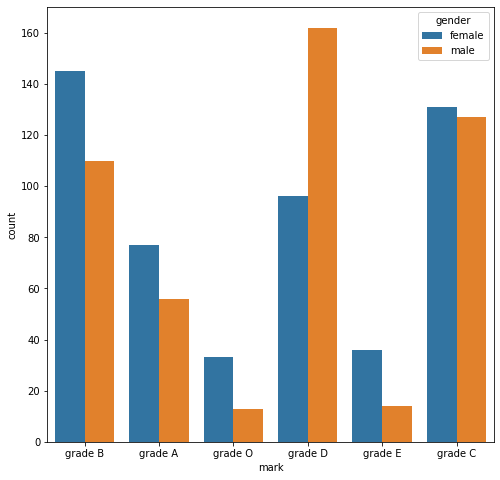

In [110]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='mark', hue='gender')

In [ ]:
O - девушки
A - девушки
В - девушки